In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_privacy
import pandas as pd
import random
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer

import tensorflow as tf
import keras
import keras_vggface
from keras_vggface.vggface import VGGFace
# Had to change code in keras vggface to make it work changed model.py line 20 as shown here https://stackoverflow.com/a/71379206
# import mtcnn
from keras.utils.data_utils import get_file
import keras_vggface.utils
import PIL
import os
import os.path


In [6]:
image_data = pd.read_csv('age_gender.csv')

In [7]:
image_data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


Reshape the images

In [9]:
imgs = image_data['pixels'].to_numpy()
imgs = np.array([x.split(' ') for x in imgs], dtype=float)
imgs = imgs.reshape(-1,48,48,1).astype(int)

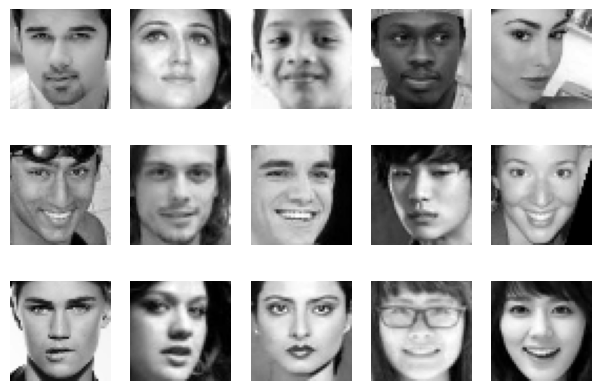

In [13]:
fig,axs=plt.subplots(3,5,figsize=(7.5,5))

# Plot 15 random images
for i in range(3):
    for j in range(5):
        axs[i,j].imshow(imgs[random.randint(0,10000)].reshape(48,48), cmap='gray')
        axs[i,j].axis('off')

In [ ]:
data_aug = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.2), ])

In [ ]:
base = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3))


In [ ]:
from keras.layers import Dense, Flatten, Input
from keras_vggface.vggface import VGGFace

num_classes = 2

base.trainable = False
last_layer = base.get_layer('avg_pool').output

inputs = tf.keras.Input(shape=(224, 224, 3))

x = data_aug(inputs)
x = base(x)
x = Flatten(name='flatten')(x)

out = Dense(num_classes, name='classifier')(x)

custom_model = keras.Model(inputs, out)

In [ ]:
noise_multiplier = 1.1
l2_norm_clip = 1.0
num_microbatches = 32
learning_rate = 0.15

In [ ]:
optimizer = DPGradientDescentGaussianOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate
)

In [ ]:
custom_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
